Complete Data set can be downloaded from [here](http://apps.who.int/gho/data/node.main.VIOLENCEPREVENTIONPROGRAMMES?lang=en).
<br>
This data set is about extent of implementation of four programmes dring 2012-2014 in 132 countries.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv("data sets/VIOLENCE_EXTENTIMP_CHILDHOMEVISIT,VIOLENCE_EXTENTIMP_YOUTHLIFESKILLS,VIOLENCE_EXTENTIMP_PARTNERVIOLPREVENTION,VIOLENCE_EXTENTIMP_ELDERCAREGIVER.csv", header=[0,1], index_col=0)

In [9]:
df.head()

,Child maltreatment: Extent of implementation of home-visiting programmes,Youth violence: Extent of implementation of life-skills and social development programmes,Intimate partner violence: Extent of implementation of dating violence prevention programmes,Elder abuse: Extent of implementation of caregiver-support programmes
Country,2012-2014,2012-2014,2012-2014,2012-2014
Afghanistan,None,Limited,None,Don't know
Albania,Limited,Limited,Limited,Larger scale
Algeria,Limited,Larger scale,Limited,Larger scale
Armenia,Limited,Limited,None,Larger scale
Australia,Larger scale,None,Larger scale,Larger scale


In [10]:
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       ...
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America', 'Uzbekistan',
       'Vanuatu', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=132)

#### accessing column

In [16]:
col_data = df.xs(('Child maltreatment: Extent of implementation of home-visiting programmes', ' 2012-2014'), level=[0,1], axis=1)
col_data.head()

,Child maltreatment: Extent of implementation of home-visiting programmes
Country,2012-2014
Afghanistan,None
Albania,Limited
Algeria,Limited
Armenia,Limited
Australia,Larger scale


In [11]:
df.describe()

,Child maltreatment: Extent of implementation of home-visiting programmes,Youth violence: Extent of implementation of life-skills and social development programmes,Intimate partner violence: Extent of implementation of dating violence prevention programmes,Elder abuse: Extent of implementation of caregiver-support programmes
Country,2012-2014,2012-2014,2012-2014,2012-2014
count,132,132,132,132
unique,3,4,4,4
top,Limited,Larger scale,None,Larger scale
freq,55,69,57,52


#### visualizing extent  of implementation of programmes

In [12]:
list_of_unique_values_in_df_columns = [df[i].unique().tolist() for i in df.columns]
unique_values_in_df = set(x for l in list_of_unique_values_in_df_columns for x in l)
unique_values_in_df

{"Don't know", 'Larger scale', 'Limited', 'None'}

In [13]:
df_plot1 = pd.DataFrame(columns=list(unique_values_in_df), index=range(0,len(df.columns)))
df_plot1.replace({np.nan:0}, inplace=True)
df_plot1

,None,Don't know,Larger scale,Limited
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0


In [14]:
i = 0
for col in df.columns:
    df_plot1.iloc[i] = [df[col].value_counts()[col_] if col_ in df[col].unique() else 0 for col_ in df_plot1]
    i += 1

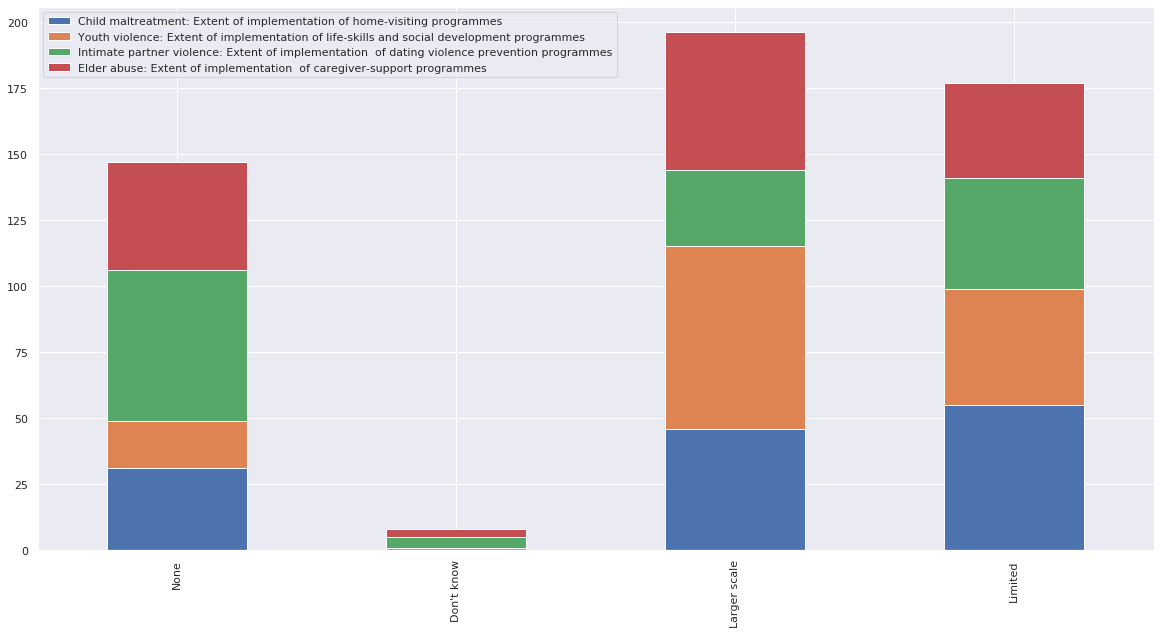

In [15]:
sns.set(rc={'figure.figsize':(20,10)})
df_plot1.set_index([pd.Index(list(df.columns.get_level_values(0)))]).T.plot(kind='bar', stacked=True)

#### In this notebook we learnt:
 - how to read a csv file with two header rows
 - how to access a multi level column in data frame
 - how to view the count of unique values and most frequent value in each column
 - how to visualize using a stacked bar plot.